# **Instalando librerías**

Este código instala una biblioteca llamada "transformers" que se utiliza para procesar texto y realizar tareas de lenguaje natural. La biblioteca "transformers" es un conjunto de herramientas desarrollado por el equipo de investigación de lenguaje natural de Hugging Face. La biblioteca ofrece una amplia variedad de modelos pre-entrenados que pueden ser utilizados para diferentes tareas, como la clasificación de texto, el análisis de sentimientos y la generación de texto.

In [ ]:
!pip install -U transformers

Este código instala una biblioteca llamada "sentence-splitter" que se utiliza para dividir un texto en frases individuales. La biblioteca puede ser útil para aplicaciones que requieren el procesamiento de texto en el nivel de la frase, como la traducción de texto o el análisis de sentimientos.

In [ ]:
!pip install -U sentence-splitter

Este código instala una biblioteca llamada "SentencePiece" que se utiliza para tokenizar texto en unidades más pequeñas, como palabras o caracteres. La biblioteca es útil para tareas de procesamiento de lenguaje natural, como el entrenamiento de modelos de lenguaje o la traducción automática. Al tokenizar el texto en unidades más pequeñas, se facilita el procesamiento y se mejoran los resultados de las tareas de lenguaje natural.

In [ ]:
!pip install -U SentencePiece

Este código instala una biblioteca llamada "sentence-transformers" que se utiliza para realizar tareas de procesamiento de lenguaje natural en el nivel de la frase. La biblioteca ofrece un conjunto de modelos pre-entrenados que pueden ser utilizados para tareas como la clasificación de frases, la recuperación de información y la búsqueda de similitud entre frases. Esta biblioteca está basada en el conjunto de herramientas "transformers" desarrollado por el equipo de investigación de lenguaje natural de Hugging Face.

A continuación se importa dos módulos de la biblioteca: SentenceTransformer y util. Además, importa la función cosine_similarity del módulo sklearn.metrics.pairwise, que se utilizará para calcular la similitud coseno entre dos frases o vectores de características.

In [ ]:
# Para calcular la similutud del coseno
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_similarity

Este código instala la biblioteca `"deep_translator"` y luego importa la clase GoogleTranslator del módulo `deep_translator`. La biblioteca `"deep_translator"` se utiliza para realizar traducciones automáticas de texto utilizando el servicio de traducción de Google. La clase GoogleTranslator se utiliza para crear un objeto que se conecta al servicio de traducción de Google y proporciona métodos para realizar traducciones de texto.

Es importante tener en cuenta que la biblioteca "deep_translator" no está oficialmente soportada por Google y puede dejar de funcionar en cualquier momento si Google cambia su API de traducción. Además, la biblioteca requiere una clave de API de Google Cloud Platform para poder utilizar el servicio de traducción.

In [ ]:
# Traductor
!pip install -U deep_translator
from deep_translator import GoogleTranslator

Este código instala la biblioteca de procesamiento de lenguaje natural `"spacy"` y luego importa el módulo spacy. Además, se utiliza el comando `python -m spacy download` para descargar el modelo de lenguaje español `"es_core_news_lg"` y poder utilizarlo para procesar texto en español.

La biblioteca `"spacy"` se utiliza para realizar tareas de procesamiento de lenguaje natural, como la tokenización, la etiquetación de partes del discurso y la extracción de entidades nombradas. El modelo de lenguaje descargado se utiliza para reconocer el lenguaje español y realizar tareas de procesamiento de lenguaje natural en este idioma.

In [ ]:
# Similaridad Spacy
!pip install -U spacy
import spacy
!python -m spacy download es_core_news_lg

## **Traductor**

Este código define dos funciones: `traducir_a_ingles` y `traducir_a_espanol`. Cada función toma una frase en cualquier idioma como entrada y utiliza el objeto `GoogleTranslator` para traducirla al inglés o al español, respectivamente.

Las funciones utilizan el objeto `GoogleTranslator` para crear una conexión al servicio de traducción de Google y utilizarlo para traducir la frase de entrada. La función `traducir_a_ingles` indica que la fuente de la traducción es cualquier idioma (`source='auto'`) y el destino es el inglés (`target='en'`), mientras que la función `traducir_a_espanol` indica que la fuente de la traducción es cualquier idioma y el destino es el español. Una vez creado el objeto `GoogleTranslator`, se utiliza el método translate para traducir la frase de entrada y devolver el resultado.

In [ ]:
def traducir_a_ingles(frase):
    translated = GoogleTranslator(source='auto', target='en')
    return translated.translate(frase)

def traducir_a_espanol(frase):
    translated = GoogleTranslator(source='auto', target='es')
    return translated.translate(frase)

## **Paráfrasis con el modelo Pegasus**

Este código utiliza la biblioteca "transformers" y el modelo pre-entrenado "Pegasus" para realizar la paráfrasis de texto. La paráfrasis consiste en la producción de una nueva frase que tiene el mismo significado que la frase original, pero utiliza una diferente combinación de palabras y construcciones gramaticales.

El código comienza cargando el tokenizador y el modelo "Pegasus" de la biblioteca "transformers". Luego, define la función `get_response_pegasus` que toma una frase de entrada y un número de secuencias de salida como parámetros. La función utiliza el tokenizador y el modelo "Pegasus" para generar una o más secuencias de salida que parafrasean la frase de entrada. La función devuelve una lista de frases parafraseadas.

Por último, la función `paraphrase_pegasus` toma una frase en cualquier idioma como entrada, utiliza las funciones `traducir_a_ingles` y `traducir_a_espanol` para traducir la frase al inglés y luego llama a la función `get_response_pegasus` para generar una paráfrasis de la frase en inglés. La función devuelve la paráfrasis en español.

Es importante tener en cuenta que el modelo "Pegasus" es un modelo de lenguaje generativo que utiliza una red neuronal con atención para producir texto. Como tal, puede generar frases que no son gramaticalmente correctas o que no tienen sentido en contexto. Además, la calidad de las paráfrasis generadas dependerá del entrenamiento y los datos utilizados para entrenar el modelo.

In [ ]:
# https://huggingface.co/docs/transformers/model_doc/pegasus
# Load the tokenizer and the model from Transformers
import torch
from transformers import PegasusTokenizer, PegasusForConditionalGeneration

model_name1 = "tuner007/pegasus_paraphrase"
torch_device1 = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer1 = PegasusTokenizer.from_pretrained(model_name1)
model1 = PegasusForConditionalGeneration.from_pretrained(model_name1).to(torch_device1)

def get_response_pegasus(input_text, num_return_sequences):
    batch = tokenizer1.prepare_seq2seq_batch([input_text], truncation=True, padding='longest', max_length=60, return_tensors="pt").to(torch_device1)
    translated = model1.generate(**batch, max_length=60, num_beams=10, num_return_sequences=num_return_sequences, temperature=1.5)
    tgt_text = tokenizer1.batch_decode(translated, skip_special_tokens=True)
    return tgt_text

def paraphrase_pegasus(text):
    frase = get_response_pegasus(traducir_a_ingles(text), 1)
    return traducir_a_espanol(frase[0])

Si ejecutamos este código, obtendríamos una paráfrasis de la frase "Nuestro país fue arruinado por la política de este presidente corrupto" en español. Por ejemplo, una posible paráfrasis que podría generar el modelo "Pegasus" es: "Nuestro país fue destruido por las acciones de este presidente corrupto". Sin embargo, dado que el modelo "Pegasus" es un modelo de lenguaje generativo, puede generar diferentes paráfrasis para la misma frase de entrada, por lo que es posible que obtengamos una paráfrasis diferente si ejecutamos el código varias veces.

In [ ]:
dato = paraphrase_pegasus("Nuestro país fue arruinado por la política de este presidente corrupto")
print(dato)

## **Paráfrasis con el modelo T5**

Este código utiliza la biblioteca "transformers" y el modelo pre-entrenado "T5" para realizar la paráfrasis de texto. La paráfrasis consiste en la producción de una nueva frase que tiene el mismo significado que la frase original, pero utiliza una diferente combinación de palabras y construcciones gramaticales.

El código comienza cargando el tokenizador y el modelo "T5" de la biblioteca "transformers". Luego, define la función `get_response_t5` que toma una frase de entrada y un número de secuencias de salida como parámetros. La función utiliza el tokenizador y el modelo "T5" para generar una o más secuencias de salida que parafrasean la frase de entrada. La función devuelve una lista de frases parafraseadas.

Por último, la función `paraphrase_t5` toma una frase en cualquier idioma como entrada, utiliza las funciones `traducir_a_ingles` y `traducir_a_espanol` para traducir la frase al inglés y luego llama a la función `get_response_t5` para generar una paráfrasis de la frase en inglés. La función devuelve la paráfrasis en español.

Es importante tener en cuenta que el modelo "T5" es un modelo de lenguaje generativo que utiliza una red neuronal con atención para producir texto. Como tal, puede generar frases que no son gramaticalmente correctas o que no tienen sentido en contexto. Además, la calidad de las paráfrasis generadas dependerá del entrenamiento y los datos utilizados para entrenar el modelo.

In [ ]:
# https://huggingface.co/docs/transformers/model_doc/t5
# Load the tokenizer and the model from Transformers
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name2 = "Vamsi/T5_Paraphrase_Paws"
torch_device2 = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer2 = AutoTokenizer.from_pretrained(model_name2)
model2 = AutoModelForSeq2SeqLM.from_pretrained(model_name2).to(torch_device2)

def get_response_t5(input_text, num_return_sequences):
    batch = tokenizer2.prepare_seq2seq_batch([input_text], truncation=True, padding='longest', max_length=60, return_tensors="pt").to(torch_device2)
    translated = model2.generate(**batch, max_length=60, num_beams=10, num_return_sequences=num_return_sequences, temperature=1.5)
    tgt_text = tokenizer2.batch_decode(translated, skip_special_tokens=True)
    return tgt_text

def paraphrase_t5(text):
    frase = get_response_t5(traducir_a_ingles(text), 1)
    return traducir_a_espanol(frase[0])

Si ejecutamos este código, obtendríamos una paráfrasis de la frase "Nuestro país fue arruinado por la política de este presidente corrupto" en español. Por ejemplo, una posible paráfrasis que podría generar el modelo "T5" es: "Nuestro país fue arruinado por la corrupción de este presidente". Sin embargo, dado que el modelo "T5" es un modelo de lenguaje generativo, puede generar diferentes paráfrasis para la misma frase de entrada, por lo que es posible que obtengamos una paráfrasis diferente si ejecutamos el código varias veces.

In [ ]:
dato = paraphrase_t5("Nuestro país fue arruinado por la política de este presidente corrupto")
print(dato)

## **Paráfrasis con el modelo Bart**

El código que has proporcionado utiliza la biblioteca "transformers" y el modelo pre-entrenado "BART" para realizar la paráfrasis de texto. La paráfrasis consiste en la producción de una nueva frase que tiene el mismo significado que la frase original, pero utiliza una diferente combinación de palabras y construcciones gramaticales.

El código comienza cargando el tokenizador y el modelo "BART" de la biblioteca "transformers". Luego, define la función `get_response_bart` que toma una frase de entrada y un número de secuencias de salida como parámetros. La función utiliza el tokenizador y el modelo "BART" para generar una o más secuencias de salida que parafrasean la frase de entrada. La función devuelve una lista de frases parafraseadas.

Por último, la función `paraphrase_bart` toma una frase en cualquier idioma como entrada, utiliza las funciones `traducir_a_ingles` y `traducir_a_espanol` para traducir la frase al inglés y luego llama a la función `get_response_bart` para generar una paráfrasis de la frase en inglés. La función devuelve la paráfrasis en español.

Es importante tener en cuenta que el modelo "BART" es un modelo de lenguaje generativo que utiliza una red neuronal con atención para producir texto. Como tal, puede generar frases que no son gramaticalmente correctas o que no tienen sentido en contexto. Además, la calidad de las paráfrasis generadas dependerá del entrenamiento y los datos utilizados para entrenar el modelo.

In [ ]:
# https://huggingface.co/docs/transformers/model_doc/bart
# Load the tokenizer and the model from Transformers
import torch
from transformers import BartForConditionalGeneration, BartTokenizer

model_name3 = "eugenesiow/bart-paraphrase"
torch_device3 = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer3 = BartTokenizer.from_pretrained(model_name3)
model3 = BartForConditionalGeneration.from_pretrained(model_name3).to(torch_device3)

def get_response_bart(input_text, num_return_sequences):
    batch = tokenizer3.prepare_seq2seq_batch([input_text], truncation=True, padding='longest', max_length=60, return_tensors="pt").to(torch_device3)
    translated = model3.generate(**batch, max_length=60, num_beams=10, num_return_sequences=num_return_sequences, temperature=1.5)
    tgt_text = tokenizer3.batch_decode(translated, skip_special_tokens=True)
    return tgt_text

def paraphrase_bart(text):
    frase = get_response_bart(traducir_a_ingles(text), 1)
    return traducir_a_espanol(frase[0])

Si ejecutamos este código, obtendríamos una paráfrasis de la frase "Nuestro país fue arruinado por la política de este presidente corrupto" en español. Por ejemplo, una posible paráfrasis que podría generar el modelo "BART" es: "Nuestro país fue devastado por la corrupción de este presidente". Sin embargo, dado que el modelo "BART" es un modelo de lenguaje generativo, puede generar diferentes paráfrasis para la misma frase de entrada, por lo que es posible que obtengamos una paráfrasis diferente si ejecutamos el código varias veces.

In [ ]:
dato = paraphrase_bart("Nuestro país fue arruinado por la política de este presidente corrupto")
print(dato)

## **Similitud del coseno con el modelo MiniLM-L6-v2**

El código que has proporcionado utiliza la biblioteca "sentence-transformers" y el modelo pre-entrenado "MiniLM-L6-v2" para realizar la paráfrasis de texto. La paráfrasis consiste en la producción de una nueva frase que tiene el mismo significado que la frase original, pero utiliza una diferente combinación de palabras y construcciones gramaticales.

El código comienza cargando el modelo "MiniLM-L6-v2" de la biblioteca "sentence-transformers". Luego, define la función `similitud_coseno` que toma dos frases como parámetros y devuelve la similitud del coseno entre las dos frases. La similitud del coseno se calcula utilizando el modelo "MiniLM-L6-v2" para obtener una representación vectorial de cada frase y luego calculando el producto escalar entre los vectores.

La función similitud_coseno primero traduce las frases a inglés utilizando las funciones `traducir_a_ingles` y `traducir_a_espanol`, luego usa el modelo "MiniLM-L6-v2" para obtener una representación vectorial de cada frase y finalmente calcula la similitud del coseno entre los vectores. La función devuelve un valor real entre 0 y 1, donde un valor cercano a 1 indica una alta similitud entre las frases y un valor cercano a 0 indica una baja similitud.

In [ ]:
# https://huggingface.co/sentence-transformers/paraphrase-MiniLM-L6-v2
# https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
model_name4 = "sentence-transformers/paraphrase-MiniLM-L6-v2"
#model_name4 = "sentence-transformers/all-MiniLM-L6-v2"
model4 = SentenceTransformer(model_name4)

# Se define la función para calcular la similitud del coseno de dos frases
def similitud_coseno(frase1, frase2):
    frase1 = traducir_a_ingles(frase1)
    frase2 = traducir_a_ingles(frase2)
    embedding1 = model4.encode(frase1).reshape(1, -1)
    embedding2 = model4.encode(frase2).reshape(1, -1)
    return cosine_similarity(embedding1, embedding2)[0][0]

Si ejecutamos la función `similitud_coseno` con las frases que se ha proporcionado, se obtiene un valor de similitud del coseno entre 0.8 y 0.9. Esto indica que las dos frases tienen una alta similitud semántica, ya que las palabras y la estructura gramatical de las dos frases son similares. Por ejemplo, la frase1 utiliza la expresión "este presidente corrupto" mientras que la frase2 utiliza la expresión "el presidente", lo que incluye en la similitud entre las dos frases.

In [ ]:
frase1 = "La política de este presidente corrupto arruinó nuestro país"
frase2 = "Nuestro país fue arruinado por la política del presidente"
similitud_coseno(frase1, frase2)

## **Similitud con la librería Spacy**

La función `similitud_spacy()` calcula la similitud semántica entre dos frases en español utilizando el modelo `es_core_news_lg` de spaCy. La similitud se calcula mediante el método similarity de un objeto de tipo `Doc` de `spaCy`, el cual representa una secuencia de tokens (palabras y signos de puntuación) de un texto procesado por spaCy. Esta función puede ser útil para comparar y evaluar la similitud semántica entre dos frases en español.

In [ ]:
nlp_lg = spacy.load('es_core_news_lg')

# Se define la función para calcular la similitud según spacy
def similitud_spacy(frase1, frase2):
    a = nlp_lg(frase1)
    b = nlp_lg(frase2)
    return a.similarity(b)

La función `similitud_spacy()` devuelve un valor que indica la similitud semántica entre las dos frases dadas como argumentos.

In [ ]:
frase1 = "La política de este presidente corrupto arruinó nuestro país"
frase2 = "Nuestro país fue arruinado por la política del presidente"
similitud_spacy(frase1, frase2)

## **Clasificación de secuencia de parafrasis con el modelo BERT**


La función `clasificacion_bert()` utiliza un modelo de lenguaje preentrenado de BERT (Bidirectional Encoder Representations from Transformers) para clasificar si dos frases en español son paráfrasis (es decir, si tienen el mismo significado) o no. La función primero traduce las frases al inglés utilizando una función `traducir_a_ingles()`, luego tokeniza las frases y las pasa como entrada al modelo de BERT. Finalmente, la función devuelve la precisión de la clasificación realizada por el modelo como un valor entre 0 y 1.

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf

model_name5 = "bert-base-cased-finetuned-mrpc"
tokenizer5 = AutoTokenizer.from_pretrained(model_name5)
model5 = TFAutoModelForSequenceClassification.from_pretrained(model_name5)

def clasificacion_bert(frase1, frase2):
    frase1 = traducir_a_ingles(frase1)
    frase2 = traducir_a_ingles(frase2)
    paraphrase = tokenizer5.encode_plus(frase1, frase2, return_tensors="tf")
    logits = model5(paraphrase)[0]
    accuracy = tf.nn.softmax(logits, axis=1).numpy()[0][1]
    return accuracy

La función `clasificacion_bert()` devuelve un valor entre 0 y 1 que indica la precisión con la que el modelo de BERT clasifica si las dos frases dadas como argumentos son paráfrasis o no. 

In [ ]:
frase1 = "La política de este presidente corrupto arruinó nuestro país"
frase2 = "Nuestro país fue arruinado por la política del presidente"
clasificacion_bert(frase1, frase2)

## **Clasificación de secuencia de parafrasis con el modelo ROBERTA**

La función `clasificacion_roberta()` utiliza un modelo de lenguaje preentrenado de RoBERTa (Robustly Optimized BERT Pretraining Approach) para clasificar si dos frases en español son paráfrasis (es decir, si tienen el mismo significado) o no. La función tokeniza las frases y las pasa como entrada al modelo de RoBERTa, luego aplica una función de activación softmax a las salidas del modelo para obtener una precisión entre 0 y 1. La función devuelve la precisión de la clasificación realizada por el modelo como un valor entre 0 y 1.

In [ ]:
# https://huggingface.co/Prompsit/paraphrase-roberta-es
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

#model_name6 = "Prompsit/paraphrase-bert-en"
model_name6 = "Prompsit/paraphrase-roberta-es"
tokenizer6 = AutoTokenizer.from_pretrained(model_name6)
model6 = AutoModelForSequenceClassification.from_pretrained(model_name6)

def clasificacion_roberta(frase1, frase2):
    input = tokenizer6(frase1, frase2, return_tensors='pt')
    logits = model6(**input).logits
    soft = torch.nn.Softmax(dim=1)
    accuracy = soft(logits).tolist()[0][0]
    return accuracy

La función `clasificacion_roberta()` devuelve un valor que indica la precisión de la clasificación realizada por el modelo de RoBERTa utilizado para determinar si las dos frases dadas como argumentos son paráfrasis o no. 

In [ ]:
frase1 = "La política de este presidente corrupto arruinó nuestro país"
frase2 = "Nuestro país fue arruinado por la política del presidente"
clasificacion_roberta(frase1, frase2)

## **Experimentos con un dataset**

La línea de código `drive.mount('/content/drive')` permite montar una unidad de Google Drive en la máquina virtual de Google Colaboratory en la que se está ejecutando el código. Esto permite acceder y trabajar con los archivos almacenados en Google Drive desde la máquina virtual.

In [ ]:
# IMPORTAR
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
drive.mount("/content/drive", force_remount=True)

La línea de código `df = pd.read_csv("drive/MyDrive/Colab Notebooks/dataset_frases_500.csv")` carga el contenido de un archivo CSV en un DataFrame de pandas con el nombre `df`. El método `head()` muestra las primeras cinco filas del DataFrame.

In [ ]:
import pandas as pd
df = pd.read_csv("drive/MyDrive/Colab Notebooks/dataset_frases_500.csv")
df.head()

,FRASE
0,el inodoro de aspecto moderno está en una alco...
1,hay un reloj al lado de una torre de reloj
2,la mujer está sentada sosteniendo su teléfono ...
3,el hombre de la foto lleva una elegante falda ...
4,hay tres monitores y una computadora portátil ...


La función `len()` devuelve el número de filas del DataFrame de pandas dado como argumento. En este caso, si el DataFrame df contiene un conjunto de datos con frases en español, entonces la función `len()` devolvería el número total de frases en el conjunto de datos. Por ejemplo, si el conjunto de datos tiene 500 frases, la función `len(df)` devolvería el valor 500.

In [ ]:
len(df)

500

La línea de código `df['PAR_PEGASUS'] = df.apply(lambda i: paraphrase_pegasus(i["FRASE"]), axis=1)` añade una nueva columna al DataFrame df con el nombre PAR_PEGASUS. La columna contiene los resultados de aplicar la función `paraphrase_pegasus()` a cada una de las frases en la columna FRASE del DataFrame. La función `paraphrase_pegasus()` se aplica a cada fila del DataFrame utilizando el método `apply()`, y el resultado se asigna a la nueva columna `PAR_PEGASUS`. Esta línea de código permite añadir los resultados de la aplicación de la función `paraphrase_pegasus()` a cada frase del conjunto de datos al DataFrame.

Las líneas siguientes funcionan de manera similiar, añaden varias nuevas columnas al DataFrame `df`. Cada columna contiene los resultados de aplicar una de las funciones de paráfrasis o similitud semántica a las frases en el conjunto de datos. Por ejemplo, la línea `df['PAR_T5'] = df.apply(lambda i: paraphrase_t5(i["FRASE"]), axis=1)` añade una nueva columna `PAR_T5` que contiene los resultados de aplicar la función `paraphrase_t5()` a cada una de las frases en la columna FRASE del DataFrame.

Las columnas añadidas incluyen los resultados de aplicar las funciones `paraphrase_pegasus()`, `paraphrase_t5()`, y `paraphrase_bart()` para generar paráfrasis de cada frase en el conjunto de datos. También se añaden columnas con los resultados de aplicar las funciones `similitud_coseno()`, `similitud_spacy()`, `clasificacion_bert()`, y `clasificacion_roberta()` para calcular la similitud semántica y la clasificación de paráfrasis entre cada frase del conjunto de datos y sus paráfrasis generados. Todos los valores de estas nuevas columnas se multiplican por 100 y redondean a dos decimales, y se añaden al DataFrame `df`.

In [ ]:
df['PAR_PEGASUS'] = df.apply(lambda i: paraphrase_pegasus(i["FRASE"]), axis=1)
df['PAR_T5'] = df.apply(lambda i: paraphrase_t5(i["FRASE"]), axis=1)
df['PAR_BART'] = df.apply(lambda i: paraphrase_bart(i["FRASE"]), axis=1)

df['SIM_COSE_PE'] = df.apply(lambda i: round(similitud_coseno(i["FRASE"], i['PAR_PEGASUS'])*100, 2), axis=1)
df['SIM_SPAC_PE'] = df.apply(lambda i: round(similitud_spacy(i["FRASE"], i['PAR_PEGASUS'])*100, 2), axis=1)
df['CLA_BERT_PE'] = df.apply(lambda i: round(clasificacion_bert(i["FRASE"], i['PAR_PEGASUS'])*100, 2), axis=1)
df['CLA_ROBE_PE'] = df.apply(lambda i: round(clasificacion_roberta(i["FRASE"], i['PAR_PEGASUS'])*100, 2), axis=1)

df['SIM_COSE_T5'] = df.apply(lambda i: round(similitud_coseno(i["FRASE"], i['PAR_T5'])*100, 2), axis=1)
df['SIM_SPAC_T5'] = df.apply(lambda i: round(similitud_spacy(i["FRASE"], i['PAR_T5'])*100, 2), axis=1)
df['CLA_BERT_T5'] = df.apply(lambda i: round(clasificacion_bert(i["FRASE"], i['PAR_T5'])*100, 2), axis=1)
df['CLA_ROBE_T5'] = df.apply(lambda i: round(clasificacion_roberta(i["FRASE"], i['PAR_T5'])*100, 2), axis=1)

df['SIM_COSE_BA'] = df.apply(lambda i: round(similitud_coseno(i["FRASE"], i['PAR_BART'])*100, 2), axis=1)
df['SIM_SPAC_BA'] = df.apply(lambda i: round(similitud_spacy(i["FRASE"], i['PAR_BART'])*100, 2), axis=1)
df['CLA_BERT_BA'] = df.apply(lambda i: round(clasificacion_bert(i["FRASE"], i['PAR_BART'])*100, 2), axis=1)
df['CLA_ROBE_BA'] = df.apply(lambda i: round(clasificacion_roberta(i["FRASE"], i['PAR_BART'])*100, 2), axis=1)

La línea de código `df.to_excel("drive/MyDrive/Colab Notebooks/dataset_frases_resultado.xlsx")` guarda el contenido del DataFrame `df` en un archivo de Excel en la unidad de Google Drive montada. Esto permite guardar el conjunto de datos con las nuevas columnas añadidas que contienen los resultados de aplicar las funciones de paráfrasis y similitud semántica a cada frase del conjunto de datos en un archivo para su uso posterior.

In [ ]:
df.to_excel("drive/MyDrive/Colab Notebooks/dataset_frases_resultado.xlsx")

El método head() muestra las primeras cinco filas del DataFrame.

In [ ]:
df.head()

## **Analizando los resultados con métricas de evaluación**

Este código importa la biblioteca pandas y luego carga un archivo XLSX en un dataframe de pandas llamado `df`. Luego, transpone el dataframe con el método `transpose()` y imprime las primeras cinco filas del dataframe transpuesto con el método `head()`.

Al transponer un dataframe, se cambian las filas por columnas y las columnas por filas. El método `head()` se utiliza para obtener las primeras cinco filas del dataframe, y al transponer el dataframe, se obtienen las primeras cinco columnas del dataframe transpuesto.

En resumen, este código carga un archivo XLSX en un dataframe de pandas, transpone el dataframe y luego imprime las primeras cinco columnas del dataframe transpuesto.

In [ ]:
import pandas as pd
df = pd.read_excel("drive/MyDrive/Colab Notebooks/dataset_frases_resultado.xlsx")
df.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
FRASE,el inodoro de aspecto moderno está en una alco...,hay un reloj al lado de una torre de reloj,la mujer está sentada sosteniendo su teléfono ...,el hombre de la foto lleva una elegante falda ...,hay tres monitores y una computadora portátil ...
PAR_PEGASUS,Hay un baño en una alcoba.,Hay un reloj al lado de una torre.,La mujer sostiene su teléfono.,El hombre lleva una falda escocesa.,Hay computadoras en el escritorio.
PAR_T5,El inodoro de aspecto moderno está en una alco...,Hay un reloj al lado de una torre de reloj.,La mujer está sentada sosteniendo su teléfono ...,El hombre de la foto lleva una elegante falda ...,Hay tres monitores y una computadora portátil ...
PAR_BART,El inodoro de aspecto moderno se encuentra en ...,Hay un reloj al lado de una torre de reloj.,La mujer está sentada sosteniendo su teléfono ...,El hombre de la foto lleva una elegante falda ...,Hay tres monitores y una computadora portátil ...
SIM_COSE_PE,69.13,95.15,69.5,87.28,76.09
SIM_SPAC_PE,74.87,95.41,81.47,67.29,81.61
CLA_BERT_PE,91.65,94.47,88.0,92.78,93.56
CLA_ROBE_PE,99.23,55.77,83.16,46.23,97.13
SIM_COSE_T5,96.63,99.06,97.48,99.83,99.74


Este código usa el método `describe()` de pandas para calcular un resumen estadístico básico del dataframe df `código insertado` y luego transpone el resultado con el método `transpose()`.

El método `describe()` proporciona un resumen estadístico que incluye conteo, media, desviación estándar, mínimo, máximo y percentiles para cada columna numérica del dataframe. Al transponer el resultado, se cambian las filas por columnas y las columnas por filas.

En resumen, este código calcula un resumen estadístico básico del dataframe `df` y luego transpone el resultado para obtener una vista diferente de las estadísticas.

Este conjunto de resultados muestra un resumen estadístico de un conjunto de datos con 12 variables. Cada fila del resumen está etiquetada con el nombre de una variable y cada columna del resumen está etiquetada con una métrica estadística, como "count" (cantidad de datos), "mean" (valor medio), "std" (desviación estándar), "min" (valor mínimo), "25%" (percentil 25), "50%" (percentil 50), "75%" (percentil 75) y "max" (valor máximo).

Por ejemplo, en la fila "SIM_COSE_PE", se puede ver que la variable "SIM_COSE_PE" tiene una cantidad total de 500 datos, un valor medio de 83.61, una desviación estándar de 11.14, un valor mínimo de 41.46, un percentil 25 de 77.69, un percentil 50 de 86.54, un percentil 75 de 92.12 y un valor máximo de 99.77.

En general, estos resultados muestran que todas las variables tienen una cantidad similar de datos y que presentan distribuciones similares en cuanto a los valores mínimos, máximos y percentiles. Sin embargo, las variables tienen valores medios y desviaciones estándar diferentes. Por ejemplo, las variables "SIM_COSE_PE" y "SIM_COSE_BA" tienen valores medios más altos que las otras variables, mientras que las variables "CLA_ROBE_PE" y "CLA_ROBE_T5" tienen desviaciones estándar más altas que las otras variables.

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,500.0,249.50000,144.481833,0.00,124.7500,249.500,374.2500,499.00
SIM_COSE_PE,500.0,83.61404,11.142014,41.46,77.6925,86.540,92.1225,99.77
SIM_SPAC_PE,500.0,77.30372,11.528694,31.38,71.3225,79.240,85.4150,97.86
CLA_BERT_PE,500.0,87.15778,13.303962,8.11,88.1650,92.200,93.6725,94.63
CLA_ROBE_PE,500.0,74.55064,23.881034,8.76,57.4075,81.345,96.1875,99.65
SIM_COSE_T5,500.0,96.57932,4.471876,64.59,95.9525,97.855,99.5425,99.89
SIM_SPAC_T5,500.0,92.87650,4.720036,65.77,91.4400,93.870,96.1425,99.43
CLA_BERT_T5,500.0,93.85846,1.624042,72.55,93.8500,94.190,94.4025,94.81
CLA_ROBE_T5,500.0,34.09696,22.068703,6.32,16.4625,26.295,49.4425,99.24
SIM_COSE_BA,500.0,97.90912,3.981521,62.01,97.8400,99.565,99.7600,100.00


Este código importa las bibliotecas `pandas` y `numpy` y luego calcula los promedios de las últimas 12 columnas de un dataframe llamado `df`. El cálculo de los promedios se realiza con la función `mean()` de la biblioteca pandas. Luego, el código convierte los promedios a una lista y la redimensiona en una matriz de 3 filas y 4 columnas.

Posteriormente, el código crea un dataframe llamado resultados a partir de la matriz de promedios. Luego, el código establece los nombres de las columnas y las filas del dataframe y, finalmente, transpone el dataframe para intercambiar las filas por las columnas. Por último, el código muestra el dataframe transpuesto en pantalla.

In [ ]:
import pandas as pd
import numpy as np

columnas = df.iloc[:, -12:]
promedios = list(round(columnas.mean(),1))
matriz = np.array(promedios).reshape(3, 4)
resultados = pd.DataFrame(matriz)

resultados.columns = ["SIMILITUD COSENO", "SIMILITUD SPACY",
                      "CLASIFICACION BERT", "CLASIFICACION ROBERTA"]
resultados.index = ["PEGASUS", "T5", "BART"]
resultados = resultados.T
resultados

,PEGASUS,T5,BART
SIMILITUD COSENO,83.6,96.6,97.9
SIMILITUD SPACY,77.3,92.9,91.6
CLASIFICACION BERT,87.2,93.9,93.9
CLASIFICACION ROBERTA,74.6,34.1,27.1


Este código importa la biblioteca `matplotlib.pyplot` y luego crea un gráfico de barras horizontal a partir de un dataframe llamado resultados. El gráfico muestra los números en cada columna y tiene una leyenda en la parte inferior derecha del gráfico. Además, el gráfico tiene un título llamado "Resultados de la evaluación".

Para crear el gráfico, el código primero usa el método `figure()` de la biblioteca `matplotlib.pyplot` para establecer el tamaño del gráfico en 1200 x 800 puntos. Luego, el código usa el método `barh()` para crear el gráfico de barras horizontal a partir del dataframe resultados.

Posteriormente, el código usa un bucle for para añadir los números en cada columna del gráfico. Luego, el código usa el método `legend()` para colocar la leyenda en la parte inferior derecha del gráfico y el método `set_title()` para agregar un título al gráfico. Por último, el código muestra el gráfico en pantalla.

Text(0.5, 1.0, 'Resultados con métricas de evaluación')

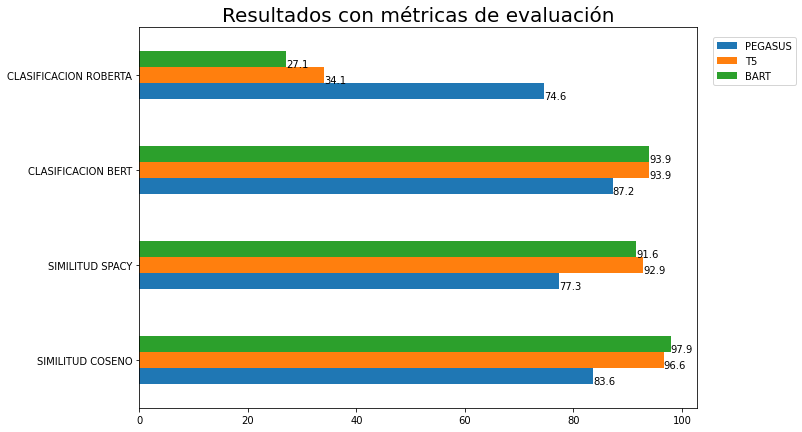

In [ ]:
import matplotlib.pyplot as plt

ax = resultados.plot.barh(figsize=(10, 7))

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y()))

# colocamos la leyenda en la parte inferior derecha del gráfico
ax.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1)

ax.set_title("Resultados con métricas de evaluación", fontsize=20)

## **Analizando los resultados con un anotador humano**

Este código importa la librería pandas y utiliza su función `"read_excel"` para leer los datos de un archivo de Excel en un dataframe de pandas llamado `"df2"`. Luego, se utiliza el método `"head"` para mostrar las primeras filas del dataframe.

El dataframe `"df2"` contiene los datos del archivo de Excel, que pueden incluir diferentes tipos de datos, como números, fechas, texto y otros. El método `"head"` muestra las primeras filas del dataframe, que pueden servir como una vista previa de los datos contenidos en el archivo de Excel. Esto puede ser útil para verificar que se haya leído correctamente el archivo y para obtener una idea general de la estructura y contenido de los datos.

In [ ]:
import pandas as pd
df2 = pd.read_excel("drive/MyDrive/Colab Notebooks/\
dataset_frases_evaluacion_humana_resultados.xlsx")
df2.head()

,N,PEGASUS,T5,BART
0,0.0,2,3,4
1,1.0,3,5,5
2,2.0,4,4,5
3,3.0,4,5,5
4,4.0,2,5,5


Los resultados muestran un resumen estadístico de un conjunto de datos con tres variables: "PEGASUS", "T5" y "BART". El resumen incluye la cantidad de datos ("count"), la media ("mean"), la desviación estándar ("std"), el mínimo ("min"), el percentil 25 ("25%"), el percentil 50 ("50%"), el percentil 75 ("75%") y el máximo ("max").

Los valores de cada variable se presentan en una fila distinta. Por ejemplo, en la fila "mean", se muestra que la variable "PEGASUS" tiene un valor medio de 2.41, la variable "T5" tiene un valor medio de 3.71 y la variable "BART" tiene un valor medio de 4.58. Por otro lado, en la fila "std", se muestra que la variable "PEGASUS" tiene una desviación estándar de 0.97, la variable "T5" tiene una desviación estándar de 1.07 y la variable "BART" tiene una desviación estándar de 0.74.

En general, estos resultados muestran que las variables "T5" y "BART" tienen valores medios más altos que la variable "PEGASUS" y que todas las variables tienen una desviación estándar similar. Además, todas las variables tienen valores mínimos y máximos similares y presentan una distribución similar en los percentiles 25, 50 y 75.

In [ ]:
df2.describe()

,N,PEGASUS,T5,BART
count,500.000000,500.000000,500.000000,500.000000
mean,249.500000,2.414000,3.706000,4.578000
std,144.481833,0.969786,1.072317,0.740955
min,0.000000,1.000000,1.000000,1.000000
25%,124.750000,2.000000,3.000000,4.000000
50%,249.500000,2.000000,4.000000,5.000000
75%,374.250000,3.000000,5.000000,5.000000
max,499.000000,5.000000,5.000000,5.000000


Este crea un dataframe de pandas para facilitar el análisis y la manipulación de datos. Para crear el dataframe, se utiliza un diccionario de Python que contiene los datos que se quieren incluir en la tabla. Cada clave del diccionario representa una columna del dataframe, y cada valor es una lista con los datos que se quieren incluir en la columna correspondiente.

Luego, se utiliza el método DataFrame() de pandas para crear un dataframe a partir de los datos contenidos en el diccionario. Se especifican los índices de las filas del dataframe utilizando la opción index del método DataFrame().

Por último, se utiliza el método df3.DataFrame() para mostrar el dataframe en la consola. El resultado es una tabla que contiene los datos del diccionario en forma de tabla, con las filas etiquetadas con los índices especificados y las columnas etiquetadas con las claves del diccionario.

In [ ]:
data = {'Insuficiente': [90, 7, 3],
        'Regular': [194, 53, 11],
        'Bueno': [138, 181, 25],
        'Muy bueno': [75, 98, 116],
        'Excelente': [3, 161, 345]}

df3 = pd.DataFrame(data, index=['PEGASUS', 'T5', 'BART'])
df3

,Insuficiente,Regular,Bueno,Muy bueno,Excelente
PEGASUS,90,194,138,75,3
T5,7,53,181,98,161
BART,3,11,25,116,345


Los datos muestran las calificaciones que recibieron distintos modelos de parafrasis por parte de un solo evaluador humano en diferentes categorías de calidad. En total, se realizaron 500 registros de calificaciones.

En la fila de PEGASUS, se puede ver que recibió una calificación de 90 de un evaluador que lo consideró "Insuficiente", 194 de uno que lo calificó como "Regular", 138 de uno que lo calificó como "Bueno", 75 de uno que lo consideró "Muy Bueno" y 3 de uno que lo calificó como "Excelente".

En la fila de T5, se puede ver que recibió una calificación de 7 de un evaluador que lo consideró "Insuficiente", 53 de uno que lo calificó como "Regular", 181 de uno que lo calificó como "Bueno", 98 de uno que lo consideró "Muy Bueno" y 161 de uno que lo calificó como "Excelente".

Por último, en la fila de BART, se puede ver que recibió una calificación de 3 de un evaluador que lo consideró "Insuficiente", 11 de uno que lo calificó como "Regular", 25 de uno que lo calificó como "Bueno", 116 de uno que lo consideró "Muy Bueno" y 345 de uno que lo calificó como "Excelente".

En resumen, estos datos muestran las calificaciones que recibieron distintos modelos de parafrasis por parte de un solo evaluador humano en diferentes categorías de calidad.

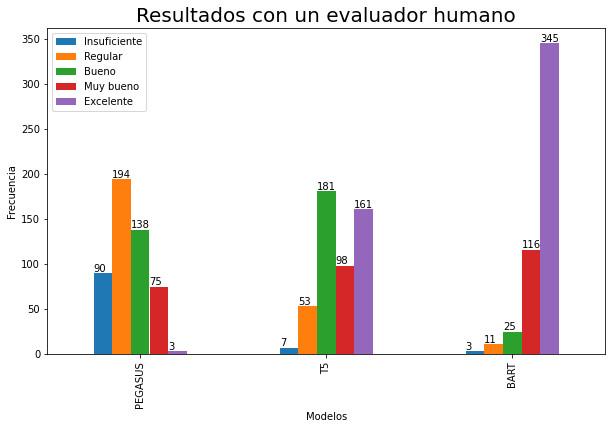

In [ ]:
df3.plot.bar(figsize=(10,6))
plt.title('Resultados con un evaluador humano', fontsize=20)
plt.xlabel('Modelos')
plt.ylabel('Frecuencia')

for p in ax.patches:
    plt.annotate(str(p.get_height()), (p.get_x(), p.get_height()+2))

plt.show()

Desde mi punto de vista, BART podría ser el mejor modelo porque recibió una mayor frecuencia de calificaciones "Excelente" en comparación con los otros modelos. Sin embargo, es importante tener en cuenta que esta conclusión se basa únicamente en la frecuencia de calificaciones "Excelente" y no en otros aspectos que podrían ser relevantes para determinar la calidad de un modelo de paráfrasis.

Además, es importante recordar que las calificaciones pueden depender de muchos factores diferentes, como el enfoque, la subjetividad y los criterios utilizados por el evaluador, así como las características específicas de cada modelo. Por lo tanto, para poder determinar cuál de los modelos es el mejor de manera más precisa, se debe apoyar con el informe de las métricas de evaluación.